Source: https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-to-classify-photos-of-dogs-and-cats/

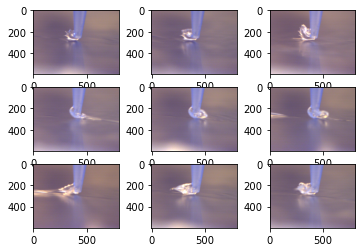

In [9]:
#plot photos

from matplotlib import pyplot
from matplotlib.image import imread

# define location of dataset
folder = 'images_bad4/'

# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = folder + 'bad_' + str(i+1) + '.png'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
    
# show the figure
pyplot.show()

In [10]:
# organize dataset into a useful structure
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random

# create directories
dataset_home = 'dataset_printer/'
subdirs = ['train/', 'test/']
for subdir in subdirs:
	# create label subdirectories
	labeldirs = ['good/', 'bad/']
	for labldir in labeldirs:
		newdir = dataset_home + subdir + labldir
		makedirs(newdir, exist_ok=True)
        
# seed random number generator
seed(1)

# define ratio of pictures to use for validation
val_ratio = 0.25

# copy training dataset images into subdirectories
src_directory = 'TrainingSet/'
for file in listdir(src_directory):
	src = src_directory + '/' + file
	dst_dir = 'train/'
	if random() < val_ratio:
		dst_dir = 'test/'
	if file.startswith('good'):
		dst = dataset_home + dst_dir + 'good/'  + file
		copyfile(src, dst)
	elif file.startswith('bad'):
		dst = dataset_home + dst_dir + 'bad/'  + file
		copyfile(src, dst)

In [11]:
# vgg16 model used for transfer learning on the dogs and cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
 
# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(224, 224, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(1, activation='sigmoid')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model
 
# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	pyplot.savefig(filename + '_plot.png')
	pyplot.close()
 
# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# prepare iterator
	train_it = datagen.flow_from_directory('dataset_printer/train/',
		class_mode='binary', batch_size=64, target_size=(224, 224))
	test_it = datagen.flow_from_directory('dataset_printer/test/',
		class_mode='binary', batch_size=64, target_size=(224, 224))
	# fit model
	history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
		validation_data=test_it, validation_steps=len(test_it), epochs=10, verbose=1)
	# evaluate model
	_, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)
 
# entry point, run the test harness
run_test_harness()

Found 20 images belonging to 2 classes.
Found 12 images belonging to 2 classes.


C:\Users\Padme GM3\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
<ipython-input-11-9d153bebfd5c>:61: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_it, steps_per_epoch=len(train_it),


Epoch 1/10
1/1 [==============================] - 8s 8s/step - loss: 3.3922 - accuracy: 0.3500 - val_loss: 2.7757 - val_accuracy: 0.6667
Epoch 2/10
1/1 [==============================] - 6s 6s/step - loss: 3.7995 - accuracy: 0.7500 - val_loss: 0.6868 - val_accuracy: 0.7500
Epoch 3/10
1/1 [==============================] - 6s 6s/step - loss: 0.0809 - accuracy: 0.9500 - val_loss: 0.0633 - val_accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 6s 6s/step - loss: 8.1539e-04 - accuracy: 1.0000 - val_loss: 1.6557 - val_accuracy: 0.7500
Epoch 5/10
1/1 [==============================] - 6s 6s/step - loss: 0.2644 - accuracy: 0.8500 - val_loss: 1.0848 - val_accuracy: 0.7500
Epoch 6/10
1/1 [==============================] - 6s 6s/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.5441 - val_accuracy: 0.8333
Epoch 7/10
1/1 [==============================] - 7s 7s/step - loss: 6.1575e-05 - accuracy: 1.0000 - val_loss: 0.2379 - val_accuracy: 0.8333
Epoch 8/10
1/1 [=================

<ipython-input-11-9d153bebfd5c>:64: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  _, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)


> 100.000


In [12]:

# organize dataset into a useful structure
from os import makedirs
from os import listdir
from shutil import copyfile
# create directories
dataset_home = 'finalize_printer/'
# create label subdirectories
labeldirs = ['good/', 'bad/']
for labldir in labeldirs:
	newdir = dataset_home + labldir
	makedirs(newdir, exist_ok=True)
# copy training dataset images into subdirectories
src_directory = 'TrainingSet/'
for file in listdir(src_directory):
	src = src_directory + '/' + file
	if file.startswith('good'):
		dst = dataset_home + 'good/'  + file
		copyfile(src, dst)
	elif file.startswith('bad'):
		dst = dataset_home + 'bad/'  + file
		copyfile(src, dst)

In [13]:

# save the final model to file
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
 
# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(224, 224, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(1, activation='sigmoid')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model
 
# run the test harness for evaluating a model
def run_test_harness():
# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# prepare iterator
	train_it = datagen.flow_from_directory('finalize_printer/',
		class_mode='binary', batch_size=64, target_size=(224, 224))
	# fit model
	model.fit_generator(train_it, steps_per_epoch=len(train_it), epochs=10, verbose=0)
	# save model
	model.save('final_model.h5')
 
# entry point, run the test harness
run_test_harness()

Found 32 images belonging to 2 classes.


<ipython-input-13-d042a2431a0c>:39: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_it, steps_per_epoch=len(train_it), epochs=10, verbose=0)


In [22]:

# make a prediction for a new image.
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.models import load_model
 
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(224, 224))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 3 channels
	img = img.reshape(1, 224, 224, 3)
	# center pixel data
	img = img.astype('float32')
	img = img - [123.68, 116.779, 103.939]
	return img
 
# load an image and predict the class
def run_example():
	# load the image
	img = load_image('images/good_10.PNG')
	# load model
	model = load_model('final_model.h5')
	# predict the class
	result = model.predict(img)
	print(result[0])
 
# entry point, run the example
run_example()

1/1 [==============================] - 0s 292ms/step
[0.99978]
